# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


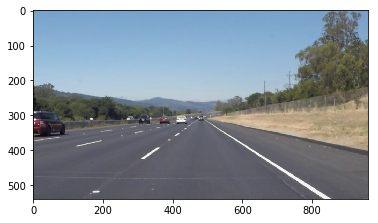

In [4]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [27]:
import math

def grayscale(img):
    """
    Applies the Grayscale transform
    
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

            
def get_line_equation(x1, y1, x2, y2, ɛ=1e-3):
    # Deal with vertical lines. ɛ set to .001 by trial and error.
    if x1 == x2:    
        x2 += ɛ

    slope = (y2 - y1) / (x2 - x1)
    constant = y1 - slope * x1
    
    return slope, constant
            
    
def draw_extrapolated_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope, constant = get_line_equation(x1, y1, x2, y2)  # only approximately similar due to ɛ
            
            # Wo know that point (x1, y1) is in the image. So we can extend the line endings outwards
            # from it by a large amount to create a line (endpoints do not need to be in the image).
            x1_ext_positive = int(x1 + img.shape[1])
            y1_ext_positive = int(slope * x1_ext_positive + constant)
            
            x1_ext_negative = int(x2 - img.shape[1])
            y1_ext_negative = int(slope * x1_ext_negative + constant)
            
            cv2.line(img, (x1_ext_positive, y1_ext_positive), (x1_ext_negative, y1_ext_negative), color, thickness)
            
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, extrapolate_lines=False):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn, as well as the lines.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    if extrapolate_lines:
        draw_extrapolated_lines(line_img, lines)
    else:
        draw_lines(line_img, lines)
    
    return line_img, lines


# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    assert np.shape(img) == np.shape(initial_img)
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [6]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

### Lane masking

In [26]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import cv2

import os


#### Image processing functions

In [28]:
def apply_lane_mask(img):
    top_left  = [int(img.shape[1] * 0.45), int(img.shape[0] * 0.59)]
    top_right = [int(img.shape[1] * 0.54), int(img.shape[0] * 0.59)]
    bot_right = [int(img.shape[1] * 0.95), int(img.shape[0] -1)]
    bot_left  = [int(img.shape[1] * 0.12), int(img.shape[0] -1)]
    return region_of_interest(img, np.array([[top_left, top_right, bot_right, bot_left]], dtype=np.int32))

def threshold(gray):
    lower_bound = 180
    upper_bound = 255
    return cv2.threshold(gray, lower_bound, upper_bound, cv2.THRESH_BINARY)

def process_img(img, extrapolate_lines=False):
    gray = grayscale(img)
    _, thresh = threshold(gray)
    thresh = apply_lane_mask(thresh)
    line_img, _ = hough_lines(thresh, 1, np.pi / 180, 20, 5, 1, extrapolate_lines)
    masked_line_img = apply_lane_mask(line_img)
    return weighted_img(masked_line_img, img)


#### Manual coordinate picking

In [329]:
# Image being analyzed in paint to find coordinates
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('Image dimensions are:', image.shape, "\n")

print("Coordiantes of lane mask vertices, in percentage of image dimensions:")
print("top left    (x, y): (%.2f, %.2f)" % (319 / 540, 419 / 960))
print("top right   (x, y): (%.2f, %.2f)" % (319 / 540, 521 / 960))
print("bottom left (x, y): (%.2f, %.2f)" % (540 / 540, 139 / 960))
print("bottom left (x, y): (%.2f, %.2f)" % (540 / 540, 938 / 960))

Image dimensions are: (540, 960, 3) 

Coordiantes of lane mask vertices, in percentage of image dimensions:
top left    (x, y): (0.59, 0.44)
top right   (x, y): (0.59, 0.54)
bottom left (x, y): (1.00, 0.14)
bottom left (x, y): (1.00, 0.98)


#### Run on images

Total number of images: 6


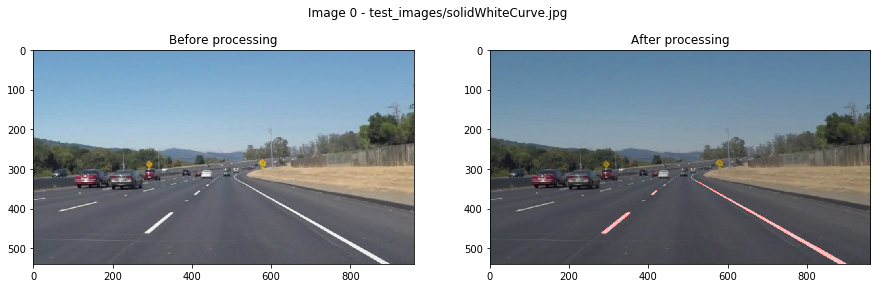

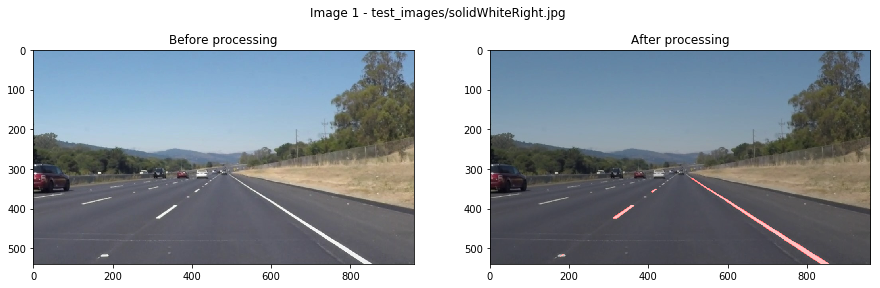

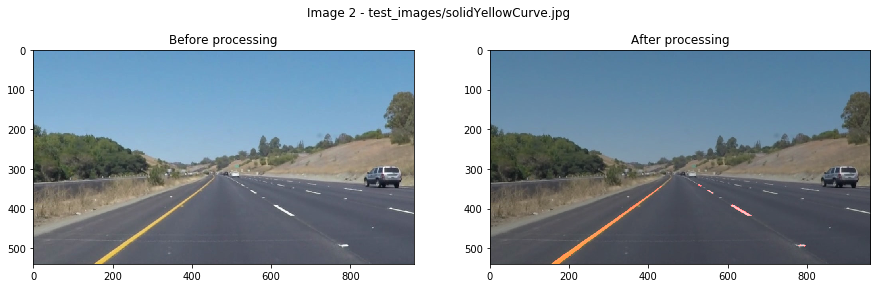

In [4]:
# Run line detector and display output
img_folder = "test_images/"
img_fnames = [img_folder + img for img in os.listdir(img_folder)]
print("Total number of images: %d" % len(img_fnames))
only_use_images = [0,1,2]

for i, img_fname in enumerate(img_fnames):
    # Can quickly specify indices of images to use
    if only_use_images and (i not in only_use_images):
        continue
    
    # Main body
    img = mpimg.imread(img_fname)
    img_out = process_img(img)
    
    # Plot output
    plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
    _, _ = plt.subplots()
    plt.subplots_adjust(top=1.)
    plt.suptitle("Image %d - %s" % (i, img_fname))
    
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Before processing")
    plt.imshow(img)
    ax = plt.subplot(1, 2, 2)
    ax.set_title("After processing")
    if len(img_out.shape) > 2:
        plt.imshow(img_out)
    else:
        plt.imshow(img_out, cmap='gray')

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [29]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Let's try the one with the solid white lane on the right first ...

In [5]:
vid_in_folder = "test_videos/"
vid_out_folder = "test_videos_output/"

for vid_in_fname in os.listdir(vid_in_folder):
    clip = VideoFileClip(vid_in_folder + vid_in_fname)
    # clip1 = VideoFileClip(vid_in_fname).subclip(0,5)  # subclip in seconds
    processed_clip = clip.fl_image(process_img)  # NOTE: this function expects color images!!
    
    %time processed_clip.write_videofile(vid_out_folder + vid_in_fname, audio=False)
    
    clip.close()
    processed_clip.close()

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:06<00:00, 40.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

Wall time: 6.91 s
[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:02<00:00, 84.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

Wall time: 2.94 s
[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:08<00:00, 80.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 8.81 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(processed_clip))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [45]:
vid_in_folder = "test_videos/"
vid_out_folder = "test_videos_output/"

# for vid_in_fname in os.listdir(vid_in_folder):
if True:
    vid_in_fname = os.listdir(vid_in_folder)[0]
    
    clip = VideoFileClip(vid_in_folder + vid_in_fname)
    # clip1 = VideoFileClip(vid_in_fname).subclip(0,5)  # subclip in seconds
    processed_clip = clip.fl_image(lambda v : process_img(v, True))  # NOTE: this function expects color images!!

    %time processed_clip.write_videofile(vid_out_folder + vid_in_fname, audio=False)
    
    clip.close()
    processed_clip.close()

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4




  0%|          | 0/682 [00:00<?, ?it/s]

  1%|          | 6/682 [00:00<00:11, 58.13it/s]

  2%|▏         | 15/682 [00:00<00:09, 70.26it/s]

  4%|▎         | 24/682 [00:00<00:08, 74.01it/s]

  5%|▍         | 32/682 [00:00<00:08, 74.71it/s]

  6%|▌         | 41/682 [00:00<00:08, 76.16it/s]

  7%|▋         | 48/682 [00:00<00:08, 74.30it/s]

  8%|▊         | 55/682 [00:00<00:08, 73.65it/s]

  9%|▉         | 62/682 [00:00<00:08, 72.65it/s]

 10%|█         | 69/682 [00:00<00:08, 72.01it/s]

 11%|█▏        | 77/682 [00:01<00:08, 71.77it/s]

 12%|█▏        | 84/682 [00:01<00:08, 71.03it/s]

 13%|█▎        | 91/682 [00:01<00:08, 70.94it/s]

 14%|█▍        | 98/682 [00:01<00:08, 70.75it/s]

 15%|█▌        | 105/682 [00:01<00:08, 70.41it/s]

 17%|█▋        | 113/682 [00:01<00:08, 70.67it/s]

 18%|█▊        | 120/682 [00:01<00:07, 70.27it/s]

 19%|█▉        | 128/682 [00:01<00:07, 70.35it/s]

 20%|█▉        | 135/682 [00:01<00:07, 70.13it/s]

 21%|██        | 142/682 [00:02<00:07, 69.77it/s]

 2

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 10.3 s


### Line Data Exploration

Among the lines I am getting, there are quite a few outliers. Here I'll explore how the data looks like and try to identify the two main lines.

#### Gather the data

In [30]:
vid_in_folder = "test_videos/"
vid_out_folder = "test_videos_output/"

# for vid_in_fname in os.listdir(vid_in_folder):
if True:
    vid_in_fname = os.listdir(vid_in_folder)[2]
    
    clip = VideoFileClip(vid_in_folder + vid_in_fname)
    # clip1 = VideoFileClip(vid_in_fname).subclip(0,5)  # subclip in seconds
    
    all_lines = np.empty((0, 4))
    for i, img in enumerate(clip.iter_frames()):
        gray = grayscale(img)
        _, thresh = threshold(gray)
        thresh = apply_lane_mask(thresh)
        _, lines = hough_lines(thresh, 1, np.pi / 180, 20, 5, 1, True)
        
        all_lines = np.vstack((all_lines, lines[:, 0]))
        
    print("Analysed %d frames." % (i+1))
    clip.close()
    print("Number of lines found in total:", len(all_lines))

Analysed 681 frames.
Number of lines found in total: 18413


#### Plot

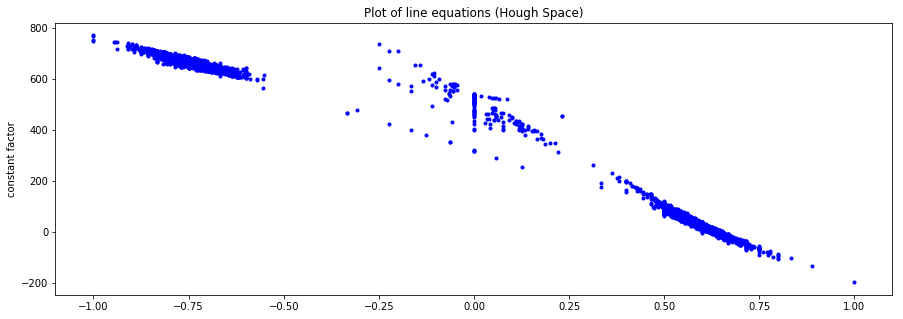

In [36]:
line_equations = np.array([get_line_equation(*line) for line in all_lines])

plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
plt.plot(line_equations[:, 0], line_equations[:, 1], "b.")
plt.title("Plot of line equations (Hough Space)")
plt.ylabel('slope')
plt.ylabel('constant factor')
plt.show()

In [40]:
from scipy.cluster.vq import kmeans
from scipy.spatial import distance

def whiten(data):
    mean = np.mean(data, axis=0)
    white_data = data - mean
    std = np.std(white_data, axis=0)
    white_data /= std
    return white_data, mean, std

def unwhiten(white_data, mean, std):
    data = white_data + mean
    data *= std
    return data

def cluster_lines(line_equations):
    centroids, _ = kmeans(white_line_equations, 2)
    return centroids

def remove_outliers_centroid_distance(whitened_line_equations, centroids):
    distances = distance.cdist(white_line_equations, white_centroids, 'euclidean')
    min_distances = np.min(distances, axis=1)
    keep_closest_n = round(0.9 * len(white_line_equations))
    indices_of_closest = np.argsort(min_distances)[:keep_closest_n]
    return white_line_equations[indices_of_closest]


Whiten:
Mean: [ -6.63159182e-02   3.43533675e+02]
New mean: [ -5.54605029e-16  -1.17282733e-12]
Standard Deviation: [   0.65680332  313.81250295]
New Standard Deviation: [ 1.  1.]
Centroid locations:
  [-0.97579462  0.97819225]
  [ 1.00888519 -1.01136413]


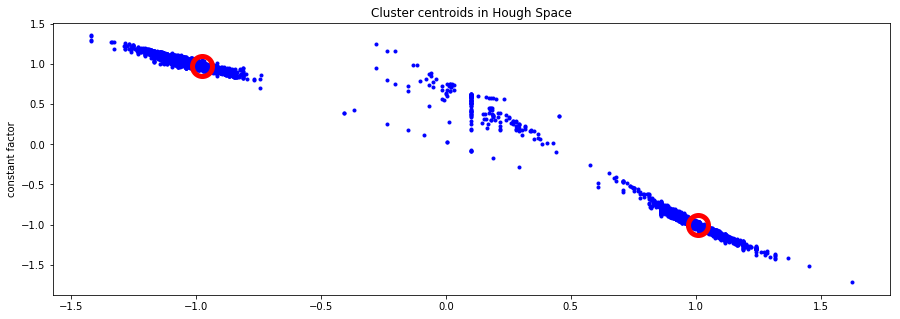

In [38]:
from scipy.cluster.vq import kmeans

# whiten now, as it will be needed for outlier removal anyway
white_line_equations, mean, std = whiten(line_equations)

# k-means
white_centroids, _ = kmeans(white_line_equations, 2)
print("Centroid locations:")
for c in white_centroids:
    print(" ", c)

plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
plt.plot(white_line_equations[:, 0], white_line_equations[:, 1], "b.")
plt.plot(white_centroids[:, 0], white_centroids[:, 1], 'or', markersize=20, markerfacecolor='none', markeredgewidth=5)
plt.title("Cluster centroids in Hough Space")
plt.ylabel('slope')
plt.ylabel('constant factor')
plt.show()



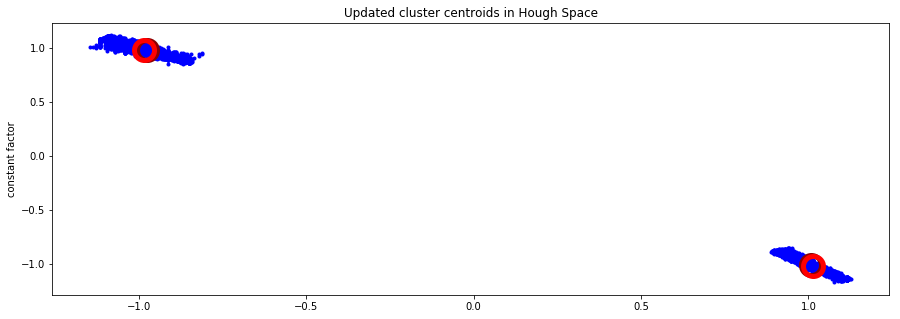

In [39]:
# Eliminate features, far from centroids

from scipy.spatial import distance

distances = distance.cdist(white_line_equations, white_centroids, 'euclidean')
min_distances = np.min(distances, axis=1)
keep_closest_n = round(0.9 * len(white_line_equations))
indices_of_closest = np.argsort(min_distances)[:keep_closest_n]

white_line_equations = white_line_equations[indices_of_closest]
new_centroids, _ = kmeans(white_line_equations, 2)

plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
plt.plot(white_line_equations[:, 0], white_line_equations[:, 1], "b.")
plt.plot(white_centroids[:, 0], white_centroids[:, 1], 'o', color="darkred", markersize=20, markerfacecolor='none', markeredgewidth=5)
plt.plot(new_centroids[:, 0], new_centroids[:, 1], 'or', markersize=20, markerfacecolor='none', markeredgewidth=5)
plt.title("Updated cluster centroids in Hough Space")
plt.ylabel('slope')
plt.ylabel('constant factor')
plt.show()

# REFLECTION: Possible way to enhance it is to factor in the variance of the data near the clusters. If something is further
# than 2 x std from both of the clusters, then drop it.


## Final Algorithm


In [51]:
# import math

import numpy as np
import cv2


def clahe_normalization(gray):
    clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(16, 16))
    return clahe.apply(gray)


def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)


# def gaussian_blur(img, kernel_size):
#     """Applies a Gaussian Noise kernel"""
#     return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


def threshold(gray):
    lower_bound = 180
    upper_bound = 255
    return cv2.threshold(gray, lower_bound, upper_bound, cv2.THRESH_BINARY)


def make_lane_mask(shape):
    top_left  = [int(shape[1] * 0.45), int(shape[0] * 0.59)]
    top_right = [int(shape[1] * 0.54), int(shape[0] * 0.59)]
    bot_right = [int(shape[1] * 0.95), int(shape[0] -1)]
    bot_left  = [int(shape[1] * 0.12), int(shape[0] -1)]
    vertices = np.array([[top_left, top_right, bot_right, bot_left]], dtype=np.int32)
    
    mask = np.zeros(shape, dtype=np.uint8)  
    if len(shape) > 2:
        channel_count = shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
        
    return mask

            
def hough_lines(img):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn, as well as the lines.
    """
    rho = 1
    theta = np.pi / 180
    threshold = 20
    min_line_length = 5
    max_line_gap = 1
    
    lines = cv2.HoughLinesP(
        img,
        rho=rho,
        theta=theta,
        threshold=threshold,
        lines=np.array([]),
        minLineLength=min_line_length,
        maxLineGap=max_line_gap
    )

    lines = lines[:, 0]
    
    return lines



def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        if np.shape(line) == (4, ):  # TODO: this is bad, hacky and ugly
            x1, y1, x2, y2 = line
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
        else:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

    
def get_line_equation(x1, y1, x2, y2, ɛ=1e-3):
    # Deal with vertical lines. ɛ set to .001 by trial and error.
    if x1 == x2:    
        x2 += ɛ

    slope = (y2 - y1) / (x2 - x1)
    constant = y1 - slope * x1
    
    return slope, constant


def lines_to_line_equations(lines):
    return np.array([get_line_equation(*line) for line in lines])
    
    
def draw_extrapolated_lines(img, line_equations, color=[255, 0, 0], thickness=2):
    x1 = img.shape[1] / 2  # validated by one of the outlier removal types. We are pretty much guaranteed to get a point on screen.
        
    for slope, constant in line_equations:
        # We know that point (x1, y1) is in the image. So we can extend the line endings outwards
        # from it by a large amount to create a line (endpoints do not need to be in the image).
        # Multipier for good measure.
        x1_ext_positive = int(x1 + img.shape[1] * 2)
        y1_ext_positive = int(slope * x1_ext_positive + constant)

        x1_ext_negative = int(x1 - img.shape[1] * 2)
        y1_ext_negative = int(slope * x1_ext_negative + constant)

        cv2.line(img, (x1_ext_positive, y1_ext_positive), (x1_ext_negative, y1_ext_negative), color, thickness)


def line_equations_to_lines(line_equations, image_shape):
    bottom_point = bottom_y = int(image_shape[0] - 1)
    top_point = int(image_shape[0] * 0.59)
    
    x1 = np.array((bottom_point - line_equations[:, 1]) / line_equations[:, 0], dtype=np.int32)
    x2 = np.array((top_point - line_equations[:, 1]) / line_equations[:, 0], dtype=np.int32)
    
    unit_array = np.ones_like(x1)
    return np.vstack((x1, bottom_point * unit_array, x2, top_point * unit_array)).T


# Python 3 has support for cool math symbols.
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    assert np.shape(img) == np.shape(initial_img)
    return cv2.addWeighted(initial_img, α, img, β, γ)


In [50]:
from scipy.cluster.vq import kmeans
from scipy.spatial import distance


def cluster_lines(line_equations):
    centroids, _ = kmeans(line_equations, 2)
    return centroids


def whiten(data):
    mean = np.mean(data, axis=0)
    white_data = data - mean
    std = np.std(white_data, axis=0)
    white_data /= std
    return white_data, mean, std


def unwhiten(white_data, mean, std):
    data = white_data + mean
    data *= std
    return data


def find_inliers_by_centroid_distance(whitened_line_equations, whitened_centroids, keep_fraction=0.9):
    """
    I assume that there are two lane lines in sight and that most of the detected lines shall be clustered around them.
    
    Therefore, findings that are dissimilar to the two clusters can be treated as outliers.
    """
    distances = distance.cdist(whitened_line_equations, whitened_centroids, 'euclidean')
    min_distances = np.min(distances, axis=1)
    keep_closest_n = round(keep_fraction * len(whitened_line_equations))
    indices_of_closest = np.argsort(min_distances)[:keep_closest_n]
    return indices_of_closest


def find_inliers_by_bottom_edge_crossing(line_equations, image_shape):
    viewport_to_boundary_distance = 0.10  # compared to bottom left and bottom right points of the mask. Values still hardcoded :(
    left_boundary  = image_shape[1] * (0.12 - viewport_to_boundary_distance)
    right_boundary = image_shape[1] * (0.95 + viewport_to_boundary_distance)
    bottom_y = int(image_shape[0] - 1)
    
    intersection_points = (bottom_y - line_equations[:, 1]) / line_equations[:, 0]
    inlier_indices = np.arange(len(line_equations))[
        (intersection_points > left_boundary) & (intersection_points < right_boundary)
    ]

    return inlier_indices


In [52]:
# # TODO: commented out as even if the idea was worth anything I can't make it work in the time that I have
# import numpy as np


# class LineEquationDispatcher:
#     history_length = 5
    
#     def __init__(self):
#         self.first_run = True
#         self.history_1 = FixedSizeList(self.history_length)
#         self.history_2 = FixedSizeList(self.history_length)
        
#     def add(self, centroids):
#         assert len(centroids) == 2
#         centroids.sort()  # Sort by slope
#         self.history_1.add(centroids[0])
#         self.history_2.add(centroids[1])
    
# # TODO: alternative
# #         if self.first_run:
# #             self.history_1.add(centroids[0])
# #             self.history_2.add(centroids[1])
# #             self.first_run = False
# #         else:
# #             # Assumption that the first few elements in the lists aren't outliers
# #             dist_1 = np.linalg.norm(self.history_1.get_mean() - centroids[0])
# #             dist_2 = np.linalg.norm(self.history_2.get_mean() - centroids[1])
# #             if dist_1 < dist_2:
# #                 self.history_1.add(centroids[0])
# #                 self.history_2.add(centroids[1])
# #             else:
# #                 self.history_1.add(centroids[1])
# #                 self.history_2.add(centroids[0])
                
#     def get_means(self):
#         return self.history_1.get_mean(), self.history_2.get_mean()

#     def get_medians(self):
#         return self.history_1.get_median(), self.history_2.get_median()
            

# class FixedSizeList:
#     def __init__(self, size):
#         self.iterator = 0
#         self.size = size
#         self.list = []
        
#     def add(self, value):
#         if len(self.list) < self.size:
#             self.list.append(value)
#         else:
#             self.list[self.iterator] = value
#             self.iterator = (self.iterator + 1) % self.size
            
#     def get_mean(self):
#         return np.mean(self.list, axis=0)
    
#     def get_median(self):
#         return np.median(self.list, axis=0)
        

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os


# It is easier to write the final composition function here, as this cell needs to be run.
def process_img(img, line_history, line_equation_history, history_length):
    extrapolate = False
    
    # Find Lines
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = clahe_normalization(gray)
    _, thresh = threshold(gray)
    mask_binary = make_lane_mask(thresh.shape)
    masked_thresh = cv2.bitwise_and(thresh, mask_binary)
    lines = hough_lines(masked_thresh)
    
    # Remove definite outliers
    line_equations = lines_to_line_equations(lines)
    
    inlier_indices = find_inliers_by_bottom_edge_crossing(line_equations, gray.shape)
    line_equations = line_equations[inlier_indices]
    lines = lines[inlier_indices]
    
    # Add lines from previous frames
    line_history.append(lines)
    line_history = line_history[-history_length:]
    line_equation_history.append(line_equations)
    line_equation_history = line_equation_history[-history_length:]    
    lines = np.vstack(line_history)
    line_equations = np.vstack(line_equation_history)
    
    # Remove remaining outliers
    w_line_equations, mean, std = whiten(line_equations)  # w_abc signifies that abc is whitened
    w_centroids = cluster_lines(w_line_equations)
    inlier_indices = find_inliers_by_centroid_distance(w_line_equations, w_centroids)
    line_equations = line_equations[inlier_indices]
    lines = lines[inlier_indices]
    
    # Average results
    centroids = cluster_lines(line_equations)
    long_lines = line_equations_to_lines(centroids, gray.shape)
    
    # Draw Results
    line_img = np.zeros_like(img)
    if extrapolate:
        draw_extrapolated_lines(line_img, centroids)
        mask_color = make_lane_mask(line_img.shape)
        line_img = cv2.bitwise_and(line_img, mask_color)
    else:
        draw_lines(line_img, long_lines)
           
    gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_RGB2GRAY)  # for testing hist normalization
    out_img = weighted_img(gray_line_img, gray)
    return out_img


vid_in_folder = "test_videos/"
vid_out_folder = "test_videos_output/"

# for vid_in_fname in os.listdir(vid_in_folder):
if True:
    vid_in_fname = os.listdir(vid_in_folder)[0]
    
    clip = VideoFileClip(vid_in_folder + vid_in_fname)
    
    line_history = []
    line_equation_history = []
    history_length = 5
    processed_clip = clip.fl_image(lambda img: process_img(img, line_history, line_equation_history, history_length))

    %time processed_clip.write_videofile(vid_out_folder + vid_in_fname, audio=False)
    
    clip.close()
    processed_clip.close()
    

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4






  0%|          | 0/251 [00:00<?, ?it/s]



  1%|          | 2/251 [00:00<00:17, 14.17it/s]



  2%|▏         | 4/251 [00:00<00:17, 14.02it/s]



  2%|▏         | 6/251 [00:00<00:17, 14.15it/s]



  3%|▎         | 8/251 [00:00<00:17, 14.00it/s]



  4%|▍         | 10/251 [00:00<00:17, 13.94it/s]



  5%|▍         | 12/251 [00:00<00:16, 14.08it/s]



  6%|▌         | 14/251 [00:00<00:16, 14.16it/s]



  6%|▋         | 16/251 [00:01<00:16, 14.14it/s]



  7%|▋         | 18/251 [00:01<00:16, 13.97it/s]



  8%|▊         | 20/251 [00:01<00:16, 14.14it/s]



  9%|▉         | 22/251 [00:01<00:16, 14.18it/s]



 10%|▉         | 24/251 [00:01<00:15, 14.22it/s]



 10%|█         | 26/251 [00:01<00:15, 14.23it/s]



 11%|█         | 28/251 [00:01<00:15, 14.29it/s]



 12%|█▏        | 30/251 [00:02<00:15, 14.23it/s]



 13%|█▎        | 32/251 [00:02<00:15, 14.25it/s]



 14%|█▎        | 34/251 [00:02<00:15, 14.30it/s]



 14%|█▍        | 36/251 [00:02<00:14, 14.36it/s]



 15%|█▌        | 38/2

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [5]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

NameError: name 'HTML' is not defined